In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

### Get the data and pre-process the data

In [2]:
df = pd.read_csv('../data/data_ready_year_trans.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,1,1,6,5,7.581210,7.581210,4.727388,3,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.360741,1,1,5,6,7.581720,7.581720,0.000000,3,...,0,0,0,1,0,0,0,0,1,0
2,4.406719,9.565775,1,1,6,6,7.580189,7.580189,4.691348,3,...,0,0,0,1,0,0,0,0,1,0
3,4.543295,9.320181,1,1,7,5,7.585281,7.585281,0.000000,4,...,0,0,0,1,0,0,0,0,1,0
4,4.317488,9.534668,1,1,5,5,7.599902,7.600402,0.000000,3,...,0,0,0,1,0,0,0,0,1,0


In [3]:
y = df.SalePrice.values
X = df.drop('SalePrice', axis=1).values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 271)
y shape: (2930,)


In [4]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [5]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [6]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [7]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### Linear Regression without Regularization

alpha: 0, rmse_val: 38.41704469517934
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.09924017243858167
R2: 0.9401180365316929


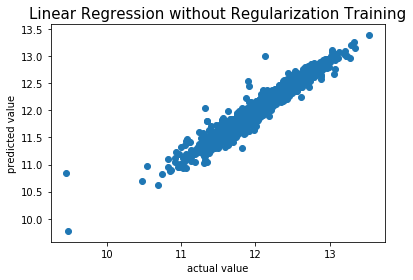

Validation:
RMSE: 38.41704469517934
R2: -8535.594347842483


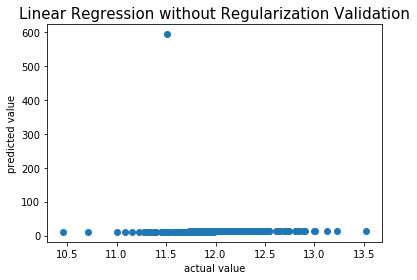

Test:
RMSE: 38.306609647084514
R2: -8651.265915164793


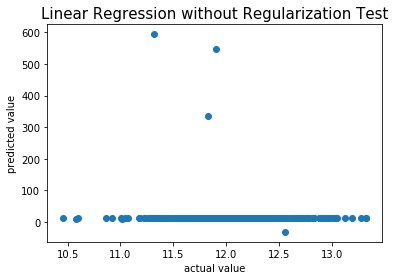

In [8]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

In [9]:
print("num: {:e}".format(62198356.001175))

num: 6.219836e+07


### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.1187349724142278
alpha: 2.25e-07, rmse_val: 0.11873003372372512
alpha: 3.375e-07, rmse_val: 0.11872885821509864
alpha: 5.0625e-07, rmse_val: 0.11873751254917717
alpha: 7.593749999999999e-07, rmse_val: 0.11876563000178143
alpha: 1.1390625e-06, rmse_val: 0.11882541917126775
alpha: 1.70859375e-06, rmse_val: 0.11892808255142469
alpha: 2.562890625e-06, rmse_val: 0.11907856345761898
alpha: 3.8443359375e-06, rmse_val: 0.11927183433632185
alpha: 5.766503906249999e-06, rmse_val: 0.11949405174781035
alpha: 8.649755859375e-06, rmse_val: 0.1197294227804491
alpha: 1.29746337890625e-05, rmse_val: 0.11996973832473505
alpha: 1.946195068359375e-05, rmse_val: 0.12021891951146861
alpha: 2.9192926025390623e-05, rmse_val: 0.12048440029718491
alpha: 4.3789389038085936e-05, rmse_val: 0.12075720057864234
alpha: 6.56840835571289e-05, rmse_val: 0.12099678751279955
alpha: 9.852612533569336e-05, rmse_val: 0.12113707945181233
alpha: 0.00014778918800354004, rmse_val: 0.12111182046920924


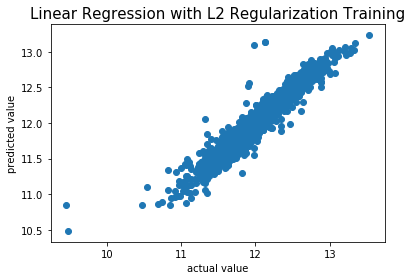

Validation:
RMSE: 0.11815829304694558
R2: 0.9192457932116013


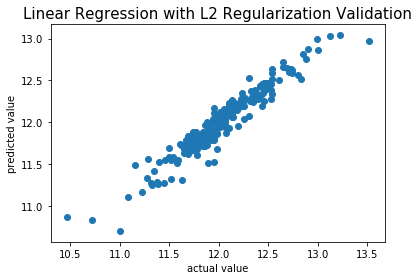

Test:
RMSE: 0.12035462630086004
R2: 0.9145901412617914


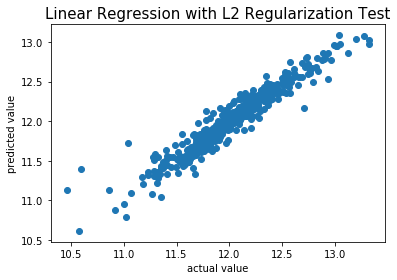

In [10]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.11628620047766845
alpha: 2.25e-07, rmse_val: 0.11571888826069568
alpha: 3.375e-07, rmse_val: 0.11536124467574006
alpha: 5.0625e-07, rmse_val: 0.11548886514558247
alpha: 7.593749999999999e-07, rmse_val: 0.1157351242895351
alpha: 1.1390625e-06, rmse_val: 0.11541744039661478
alpha: 1.70859375e-06, rmse_val: 0.11507120716486097
alpha: 2.562890625e-06, rmse_val: 0.11544434702609432
alpha: 3.8443359375e-06, rmse_val: 0.11609235663597967
alpha: 5.766503906249999e-06, rmse_val: 0.11709667795215453
alpha: 8.649755859375e-06, rmse_val: 0.11727089154702268
alpha: 1.29746337890625e-05, rmse_val: 0.11791239571353458
alpha: 1.946195068359375e-05, rmse_val: 0.11787514576112365
alpha: 2.9192926025390623e-05, rmse_val: 0.12002582943188289
alpha: 4.3789389038085936e-05, rmse_val: 0.12471217329953811
alpha: 6.56840835571289e-05, rmse_val: 0.13172634271232547
alpha: 9.852612533569336e-05, rmse_val: 0.14222823700962126
alpha: 0.00014778918800354004, rmse_val: 0.1489553635869912


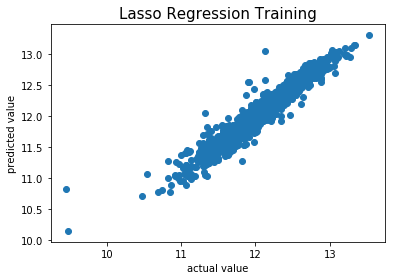

Validation:
RMSE: 0.11507120716486097
R2: 0.9234103513764849


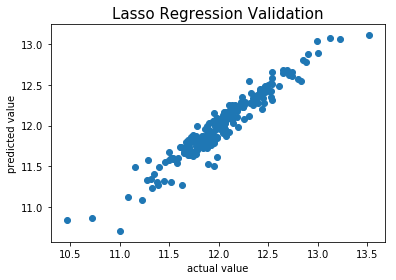

Test:
RMSE: 0.1158173791870234
R2: 0.9209084853987747


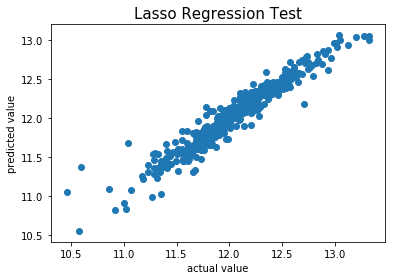

In [11]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

In [15]:
from sklearn.svm import SVR
Cs = [8e3, 1e4, 2e4 3e4, 4.4e4, 4e4, 4.5e4, 5e4]
epsilons = [0.0012]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
      model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
      model.fit(X_trn, y_trn)
      rmse_val = metric.rmse(y_val, model.predict(X_val))
      print("C: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, epsilon, rmse_val))
      if best_rmse is None or rmse_val < best_rmse:
        best_rmse = rmse_val
        best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

SyntaxError: invalid syntax (<ipython-input-15-9f9dc5a61d5c>, line 2)

### Random Forest

n_estimators: 1000, rmse_val: 0.13105494028985334
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.05084308527141585
R2: 0.9842824516570836


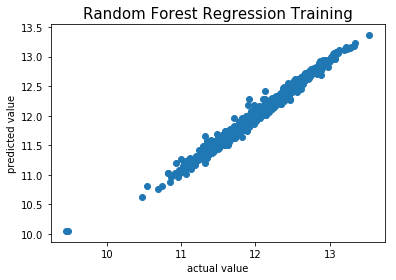

Validation:
RMSE: 0.13105494028985334
R2: 0.9006555676359242


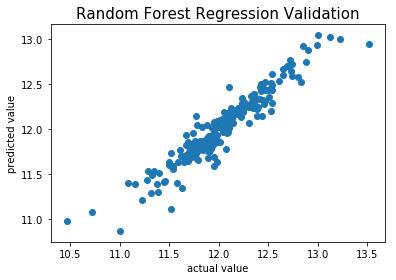

Test:
RMSE: 0.13151125479715436
R2: 0.8980215822912884


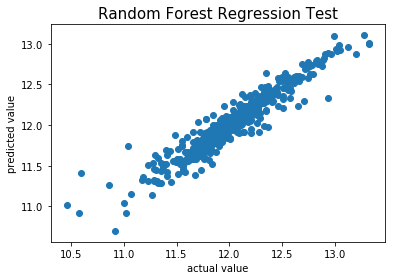

In [14]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [1000]

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators=n_estimators)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("n_estimators: {}, rmse_val: {}".format(n_estimators, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")